## Podosome analysis and plotting
A short notebook demo for podosome analysis and plot

In [1]:
import src.analyze_article as aa

analyzed = aa.article_analyze(load_config="config_loader.yaml", 
                              analysis_config="config_analysis.yaml", 
                              characters="data_characteristics.csv")


### Plotting the core filaments
Here we plot the filaments inside the core only. Note that this is a stripped-down podosome for demo purposes only.

In [2]:
import src.podosome_analyzer as poda
import numpy as np

def inside(filament,radius):
    return np.any(poda.in_radius(filament,0,radius))
def outside(filament,radius):
    return not np.any(poda.in_radius(filament,0,radius))

In [3]:
import ipyvolume as ipv
n_pod = 0
fils_in = lambda fil : inside(fil,analyzed.podosomes[n_pod]["fit_orient"]["radius_core"])
analyzed.plot_podosome(n_pod,filament_sorter=fils_in,color="red",clear=True)

    
    

### Plotting miscellaneous characteristics
Here we use the analysis results.

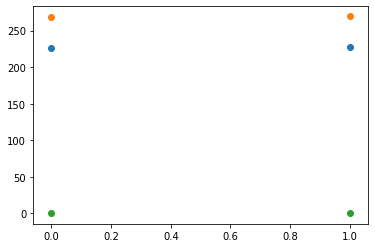

In [4]:
import matplotlib.pyplot as plt

orients = []
ranks = []
lengths = []
energys = []
for i,podosome in enumerate(analyzed.podosomes):
    ranks.append(i)
    orients.append(podosome["fit_orient"]["radius_core"])
    lengths.append(podosome["fit_length"]["radius_core"])
    energys.append(podosome["fit_energy"]["radius_core"])
    
plt.scatter(ranks,orients)
plt.scatter(ranks,lengths)
plt.scatter(ranks,energys)
plt.show()